Importar Librerias Necesarias

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
from matplotlib import DateFormatter
import numpy as np
import matplotlib.pyplot as plt


Obtener datos del CSV o Json y convertirlos en dataFrame de Pandas

In [ ]:
#leer archivo desde csv
ruta = 'Kaggle_Online_Retail.csv'
df = pd.read_csv(ruta, encoding='latin1')
df = pd.DataFrame(df)

#leer archivo desde json
ruta = 'Kaggle_Online_Retail.json'
dfJson = pd.read_json(ruta)
dfJson = pd.DataFrame(df)

Realizar un profiling de los datos con ydata_profiling y exportarlo a un archivo HTML nos proporciona una visión clara de la calidad de los datos, detectando valores nulos, vacíos y la diversidad de los mismos. Esto facilita el proceso de limpieza y manipulación de los datos para su posterior análisis, se podria realizar manualmente cada uno de estos datos pero la libreria nos permitira reducir trabajo

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("KaggleReport.html")

**MANIPULACION DE DATA**

Obtener informacion de la Data

In [ ]:
#Obtener una muestra de la Data
muestra = df.head()
#Obtener los nombres columnas de el dataframe
columns = df.columns
#obtener numero de filas y columnas
num_rows, num_columns = df.shape
#Obtener la descripcion del dataframe solamente para las columnas numericas, obteniendo datos como la media, desviacion estandar, minimo, maximo, etc.
descripcion = df.describe()
#obtener informacion de la data como el tipo de dato de cada columna, cuantos valores no nulos hay, etc.
informacion = df.info()

Crear SubDatas mediante Loc e Iloc

In [ ]:
#Obtener un fragmento de la data de la fila 0 a la 10 y de la columna 0 a la 5, iloc utiliza los indices para seleccionar
fragmento = df.iloc[:10,:5]
#obtener los datos de las columna quantity
quantityPrice = df.loc[:,['Quantity','UnitPrice']]

Limpieza de Data

In [ ]:
#obtener conteo de datos faltantes por columna
missingDataCount = df.isna().sum()
#Eliminar filas con datos faltantes
df = df.dropna()
#Eliminar columnas con datos faltantes
df = df.dropna(axis=1)
# Eliminar solo las filas en las que todos los valores son nulos
df = df.dropna(how='all')
#llenar los valores faltantes con 0
df = df.fillna(0)
#rellenar los valores faltantes con la media de la columna
df = df['Quantity'].fillna(df['Quantity'].mean())
#rellenar los valores faltantes con el valor anterior
df = df.fillna(method='ffill')
#rellenar los valores faltantes con el valor siguiente
df = df.fillna(method='bfill')

Manipulacion de Data

In [ ]:
#Crear una nueva columna 
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
#Crear columna indica si valor es mayor que 10
df['QuantityGreaterThan10'] = np.where(df['Quantity'] > 10, True, False)
#Cambiar invoiceDate a tipo fecha tambien se puede cambiar a diferentes datos con to_numeric, to_string, etc.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#crear una columna y aplicarle un porcentaje de descuento al precio unitario
df['DiscountedPrice'] = df['UnitPrice'].apply(lambda x: x * 0.9)
#Crear una columna basada en una funcion
def applyDiscount(price):
    return price * 0.9
df['DiscountedPrice2'] = df['UnitPrice'].apply(applyDiscount)

Group By Pandas

In [ ]:
#Obtener la cantidad de ventas por Pais
country_count = df['Country'].value_counts()
#suma de ventas por pais
countrSales = df.groupby('Country')['Quantity'].sum()
#Obtener la cantidad de ventas por pais 
def totalVenta(group):
    return (group['Quantity'] * group['UnitPrice']).sum()
#Ordenar los paises por total de ventas
totalVenta = (df.groupby('Country').apply(totalVenta)).sort_values(ascending=False)

Filtrado de Datos

In [ ]:
#Filtrar solo las ventas de UK y con cantidad mayor a 10
uksales = df[(df['Country'] == 'United Kingdom') & (df['Quantity'] > 10)]
#filtrar las ventas del 2011 y diciembre
datayear = df[(df['InvoiceDate'].dt.year == 2011) & df['InvoiceDate'].dt.month == 12]

Pivot Table: Resumir y organizar datos en una tabla dinámica para análisis.
Reshape: Transformar la estructura de los datos para facilitar su análisis.

In [ ]:
#Annalsizar pais por stockcode
pivot_table = pd.pivot_table(df,values='Quantity',index='Country',columns='StockCode',aggfunc='sum')
#apilar la tabla
reshape = pivot_table.stack().reset_index()

Union de Dataframes, Concatenacion Data

In [ ]:
#Generar dos Dataframe de ejemplo con llave y valor
data = pd.DataFrame({
    'llave': ['A', 'B', 'C'],
    'valor': [1, 2, 3]
})
data2 = pd.DataFrame({
    'llave': ['A', 'B', 'D'],
    'valor': [4, 5, 6]
})
#Realizar un merge de los dos dataframes 
union = pd.merge(pd.DataFrame(data),pd.DataFrame(data2),on='llave',how='inner')
outerJoin = pd.merge(pd.DataFrame(data),pd.DataFrame(data2),on='llave',how='outer')
leftJoin = pd.merge(pd.DataFrame(data),pd.DataFrame(data2),on='llave',how='left')
rightJoin = pd.merge(pd.DataFrame(data),pd.DataFrame(data2),on='llave',how='right')
#realizar concatenacion de los dataframes si es orizontal se debe especificar axis=1 sin tener en cuenta los indices 
concat = pd.concat([pd.DataFrame(data),pd.DataFrame(data2)])
concathorizontal = pd.concat([pd.DataFrame(data),pd.DataFrame(data2)],axis=1)
#realizar concatenacion teniendo en cuenta los indices
data = pd.DataFrame({
    'llave1': ['A', 'B', 'C'],
    'valor2': [1, 2, 3]
},index=[0,1,2])
data2 = pd.DataFrame({
    'llave': ['A', 'B', 'D'],
    'valor': [4, 5, 6]
},index=[0,1,2])
concat = data.join(data2,how='inner')
print(concat)



**GRAFICACION DE DATA MEDIANTE MATPLOTLIB**

Grafico de linea : Muestra tendencias y cambios en los datos a lo largo del tiempo

<function matplotlib.pyplot.show(close=None, block=None)>

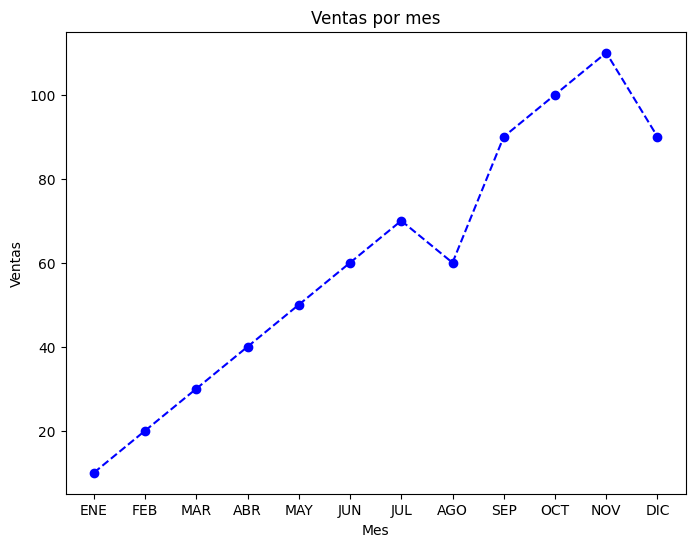

In [ ]:
#Generar array ejemplo
month = np.array(['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC'])
sales = np.array([10,20,30,40,50,60,70,60,90,100,110,90])

#Configurar el tamaño de la figura
plt.figure(figsize=(8,6))

plt.plot(month,sales,marker='o',color='blue',linestyle='--' ,linewidth= 2,label='Ventas')
#Modificaciones visuales
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')

plt.show

Gráfico de dispersión: Muestra la relación entre dos variables, permite encontrar patrones, agrupaciones o puntos atípicos en los datos.

<function matplotlib.pyplot.show(close=None, block=None)>

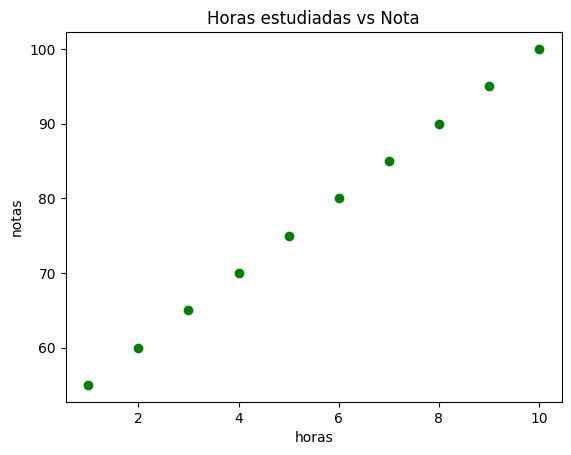

In [ ]:
plt.Figure(figsize=(8,6))

#Generar array de ejemplo
hours = [1,2,3,4,5,6,7,8,9,10]
exam = [55,60,65,70,75,80,85,90,95,100]

#grafico de dispersion
plt.scatter(hours,exam ,color = 'green')

#modificaciones visuales
plt.title('Horas estudiadas vs Nota')
plt.xlabel('horas')
plt.ylabel('notas')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

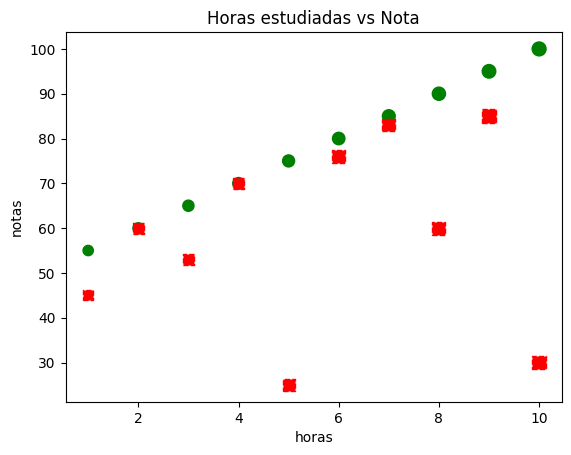

In [18]:
exam_studen1 = [55,60,65,70,75,80,85,90,95,100]
exam_studen2 = [45,60,53,70,25,76,83,60,85,30]

plt.scatter(hours,exam_studen1,exam_studen1,marker='o', color = 'green' ,linestyle='-',label='Estudiante 1')
plt.scatter(hours,exam_studen2,exam_studen1,marker='s', color = 'red' ,linestyle='--',label='Estudiante 2')

plt.title('Horas estudiadas vs Nota')
plt.xlabel('horas')
plt.ylabel('notas')

plt.show

Grafico de barras

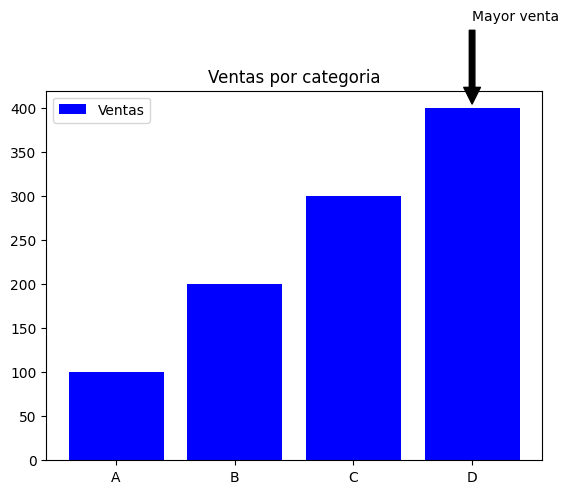

In [23]:
plt.Figure(figsize=(8,6))

#Generar array de ejemplo
categoria = ['A','B','C','D']
sales= [100,200,300,400]

#grafico de barras
plt.bar(categoria,sales,color='blue',label='Ventas')

plt.annotate('Mayor venta',xy=('D',400),xytext=('D',500),arrowprops=dict(facecolor='black',shrink=0.05))

plt.title('Ventas por categoria')
plt.legend()
plt.show()

Histograma: Permite visualizar la dispersion y distribucion de los datos

In [ ]:
#Altura de 200 personas
data = np.random.normal(170,10,200)
#Histograma (data,intervalos,color,borde,alpha)
plt.hist(data,bins=10,color='blue',edgecolor='black',alpha=0.7)
plt.title('Distribucion de altura')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()

Boxplot: resumen la distrubcion de datos a travez de sus cuartiles

In [ ]:
#establecer la semilla para que los numeros generados sean los mismos
np.random.seed(0)
ages = [np.random.normal(30,10,100),np.random.normal(40,20,100),np.random.normal(50,30,100)]
print(ages)
#data,colores en las cajas,notch=True para mostrar la mediana,labels para mostrar los nombres de los grupos,vert=False para mostrar horizontal
plt.boxplot(ages,patch_artist=True,notch=True,labels=['Grupo 1','Grupo 2','Grupo 3'],vert=False)


Subplots_Layouts 

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

x = np.linspace(0, 10, 100)
y = np.sin(x)

data = np.random.randn(100) 

gs = gridspec.GridSpec(2,2, height_ratios=[2,1],width_ratios=[1,1])
fig = plt.figure(figsize =(10,8))
# Primer subplot grande, ocupa toda la primera fila
ax1 = fig.add_subplot(gs[0,:])
ax1.plot(x,y, color = 'blue')
ax1.set_title('Seno de X')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')

# Segundo subplot, ocupa la esquina inferior izquierda
ax2 = fig.add_subplot(gs[1,0])
ax2.hist(data, bins = 20, color='purple', edgecolor='black')
ax1.set_title('Histograma')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frecuencia')

# Tercer subplot, ubicado en la esquian inferior derecha
ax3 = fig.add_subplot(gs[1,1])
ax3.scatter(x,y, color = 'red')
ax1.set_title('Dispersión de Seno')
ax1.set_xlabel('x')
ax1.set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()